
#NAMA : ERIS ALFIONITA

#NPM  : 24083010032

# **1. Perhitungan integral dan diferensial dari fungsi 'f' untuk interval x**

In [ ]:
import numpy as np
import sympy as sp
from scipy.integrate import simpson, trapezoid

# =========================
# 1. DATA
# =========================
# interval
x = np.linspace(0, 10, 500)
# fungsi deret sinusoidal
f = np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x)

# =========================
# 2. ANALITIK (Symbolic dengan sympy)
# =========================
x_sym = sp.symbols('x')
f_sym = sp.sin(x_sym) + 0.5*sp.sin(2*x_sym) + (1/3)*sp.sin(3*x_sym) + (1/4)*sp.sin(4*x_sym) + (1/5)*sp.sin(5*x_sym)

# integral tentu analitik dari 0 sampai 10
integral_analitik = sp.integrate(f_sym, (x_sym, 0, 10))

# turunan analitik
diff_analitik = sp.diff(f_sym, x_sym)

print("=== ANALITIK ===")
print("Integral analitik:", float(integral_analitik))
print("Turunan analitik:", diff_analitik)

# =========================
# 3. NUMERIK
# =========================

# --- Integral Numerik ---
# Riemann sum (kiri)
dx = x[1] - x[0]
riemann_sum = np.sum(f[:-1] * dx)

# Metode Trapesium
trapezoid_val = trapezoid(f, x)

# Metode Simpson
simpson_val = simpson(f, x)

print("\n=== NUMERIK (Integral) ===")
print("Riemann Sum  :", riemann_sum)
print("Trapesium    :", trapezoid)
print("Simpson      :", simpson)

# --- Turunan Numerik (Finite Difference) ---
h = x[1] - x[0]

# Forward difference
forward_diff = (f[1:] - f[:-1]) / h

# Backward difference
backward_diff = (f[1:] - f[:-1]) / h

# Central difference
central_diff = (f[2:] - f[:-2]) / (2*h)

print("\n=== NUMERIK (Turunan) ===")
print("Forward diff (contoh di x=0):", forward_diff[0])
print("Backward diff (contoh di x=10-h):", backward_diff[-1])
print("Central diff (contoh di x=5):", central_diff[len(central_diff)//2])


=== ANALITIK ===
Integral analitik: 2.186608062460288
Turunan analitik: cos(x) + 1.0*cos(2*x) + 1.0*cos(3*x) + 1.0*cos(4*x) + 1.0*cos(5*x)

=== NUMERIK (Integral) ===
Riemann Sum  : 2.189277994349982
Trapesium    : <function trapezoid at 0x7e2f8c248720>
Simpson      : <function simpson at 0x7e2f814302c0>

=== NUMERIK (Turunan) ===
Forward diff (contoh di x=0): 4.996319938113839
Backward diff (contoh di x=10-h): 0.020109002279914412
Central diff (contoh di x=5): 0.05273248678740594


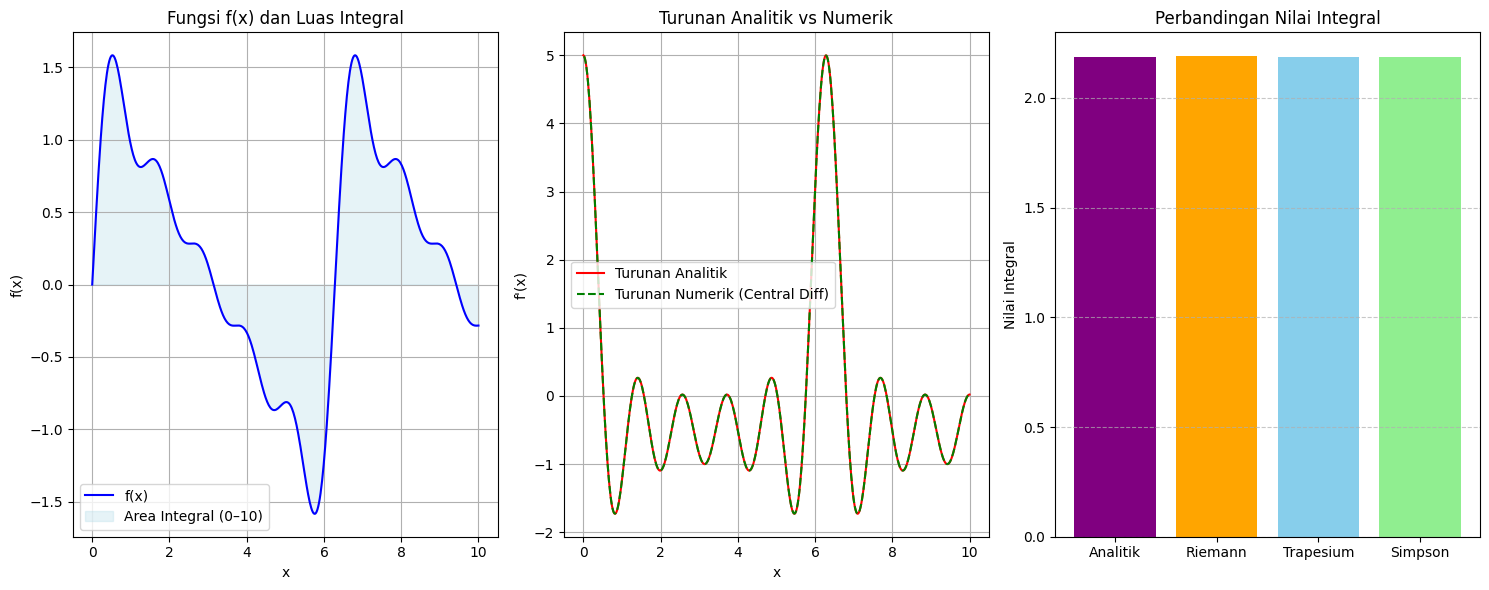

In [ ]:
import matplotlib.pyplot as plt

# =========================
# 4. VISUALISASI
# =========================

# --- Evaluasi turunan analitik untuk x ---
f_prime_analitik = sp.lambdify(x_sym, diff_analitik, "numpy")(x)

# --- Central difference untuk turunan numerik ---
x_central = x[1:-1]

plt.figure(figsize=(15,6))

# Plot 1: Fungsi + Area Integral
plt.subplot(1,3,1)
plt.plot(x, f, label="f(x)", color="blue")
plt.fill_between(x, f, alpha=0.3, color="lightblue", label="Area Integral (0–10)")
plt.title("Fungsi f(x) dan Luas Integral")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

# Plot 2: Turunan Analitik vs Numerik
plt.subplot(1,3,2)
plt.plot(x, f_prime_analitik, label="Turunan Analitik", color="red")
plt.plot(x_central, central_diff, "--", label="Turunan Numerik (Central Diff)", color="green")
plt.title("Turunan Analitik vs Numerik")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)

# Plot 3: Perbandingan Nilai Integral
methods = ["Analitik", "Riemann", "Trapesium", "Simpson"]
values = [float(integral_analitik), riemann_sum, trapezoid_val, simpson_val]

plt.subplot(1,3,3)
plt.bar(methods, values, color=["purple","orange","skyblue","lightgreen"])
plt.title("Perbandingan Nilai Integral")
plt.ylabel("Nilai Integral")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Grafik menunjukkan bahwa fungsi
𝑓
(
𝑥
)
f(x) berbentuk osilasi dengan integral total positif, artinya fungsi lebih dominan di atas sumbu-x. Turunan analitik dan numerik (central difference) hampir sama persis, menandakan akurasi tinggi metode numerik. Perbandingan integral dengan metode analitik, Riemann, Trapesium, dan Simpson menghasilkan nilai yang sangat mirip (~2.2), membuktikan bahwa metode numerik sederhana pun dapat mendekati hasil analitik dengan baik pada fungsi yang halus.

# **2. Perhitungan bagian integral atas dan bawah y=0 secara terpisah**

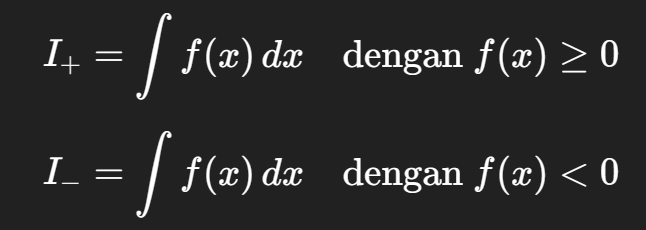

In [ ]:
import numpy as np
from scipy.integrate import simpson

# =========================
# 1. DATA
# =========================
x = np.linspace(0, 10, 500)
f = np.sin(x) + 0.5*np.sin(2*x) + (1/3)*np.sin(3*x) + (1/4)*np.sin(4*x) + (1/5)*np.sin(5*x)

# =========================
# 2. Integral positif & negatif terpisah
# =========================
# Masking area di atas dan di bawah sumbu-x
f_pos = np.where(f > 0, f, 0)   # hanya ambil nilai positif
f_neg = np.where(f < 0, f, 0)   # hanya ambil nilai negatif

# Hitung integral dengan Simpson
integral_pos = simpson(f_pos, x)
integral_neg = simpson(f_neg, x)

# Luas (area) biasanya dinyatakan absolut
area_pos = simpson(np.abs(f_pos), x)
area_neg = simpson(np.abs(f_neg), x)

print("=== Integral Terpisah ===")
print("Integral di atas sumbu-x :", integral_pos)
print("Integral di bawah sumbu-x:", integral_neg)
print("Luas di atas sumbu-x     :", area_pos)
print("Luas di bawah sumbu-x    :", area_neg)


=== Integral Terpisah ===
Integral di atas sumbu-x : 4.604544421981338
Integral di bawah sumbu-x: -2.4179364280127995
Luas di atas sumbu-x     : 4.604544421981338
Luas di bawah sumbu-x    : 2.4179364280127995


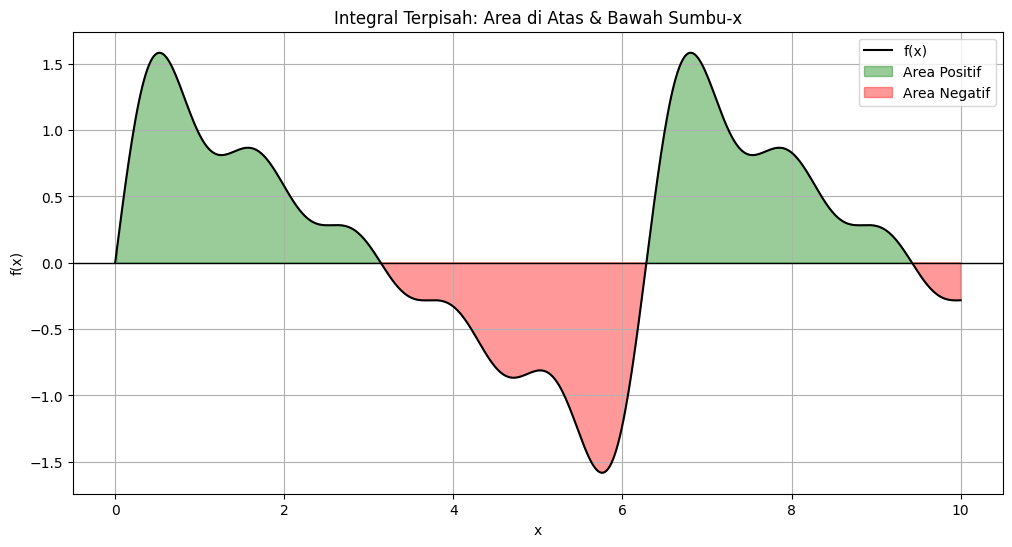

In [ ]:
import matplotlib.pyplot as plt

# =========================
# 3. Visualisasi area positif & negatif
# =========================
plt.figure(figsize=(12,6))
plt.plot(x, f, color="black", label="f(x)")

# Area positif (hijau)
plt.fill_between(x, f, 0, where=(f > 0), color="green", alpha=0.4, label="Area Positif")

# Area negatif (merah)
plt.fill_between(x, f, 0, where=(f < 0), color="red", alpha=0.4, label="Area Negatif")

plt.axhline(0, color="black", linewidth=1)  # garis y=0
plt.title("Integral Terpisah: Area di Atas & Bawah Sumbu-x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

Grafik ini menunjukkan fungsi $f(x)$ beserta luas area positif (hijau) dan negatif (merah) terhadap sumbu-x pada interval $[0,10]$. Terlihat bahwa fungsi berosilasi, naik turun melewati sumbu-x beberapa kali. Area hijau menandakan bagian di mana $f(x) > 0$, sedangkan area merah menunjukkan bagian di mana $f(x) < 0$. Dari luasannya terlihat bahwa area positif lebih dominan dibandingkan area negatif. Hal ini berarti, meskipun fungsi mengalami fluktuasi dan memiliki bagian negatif, secara keseluruhan kontribusi nilai positif lebih besar, sehingga integral total bernilai positif. Dengan kata lain, rata-rata fungsi ini lebih sering berada di atas sumbu-x dibandingkan di bawahnya.


# **3. Bentuk plot fungsi: f, f', dan F**

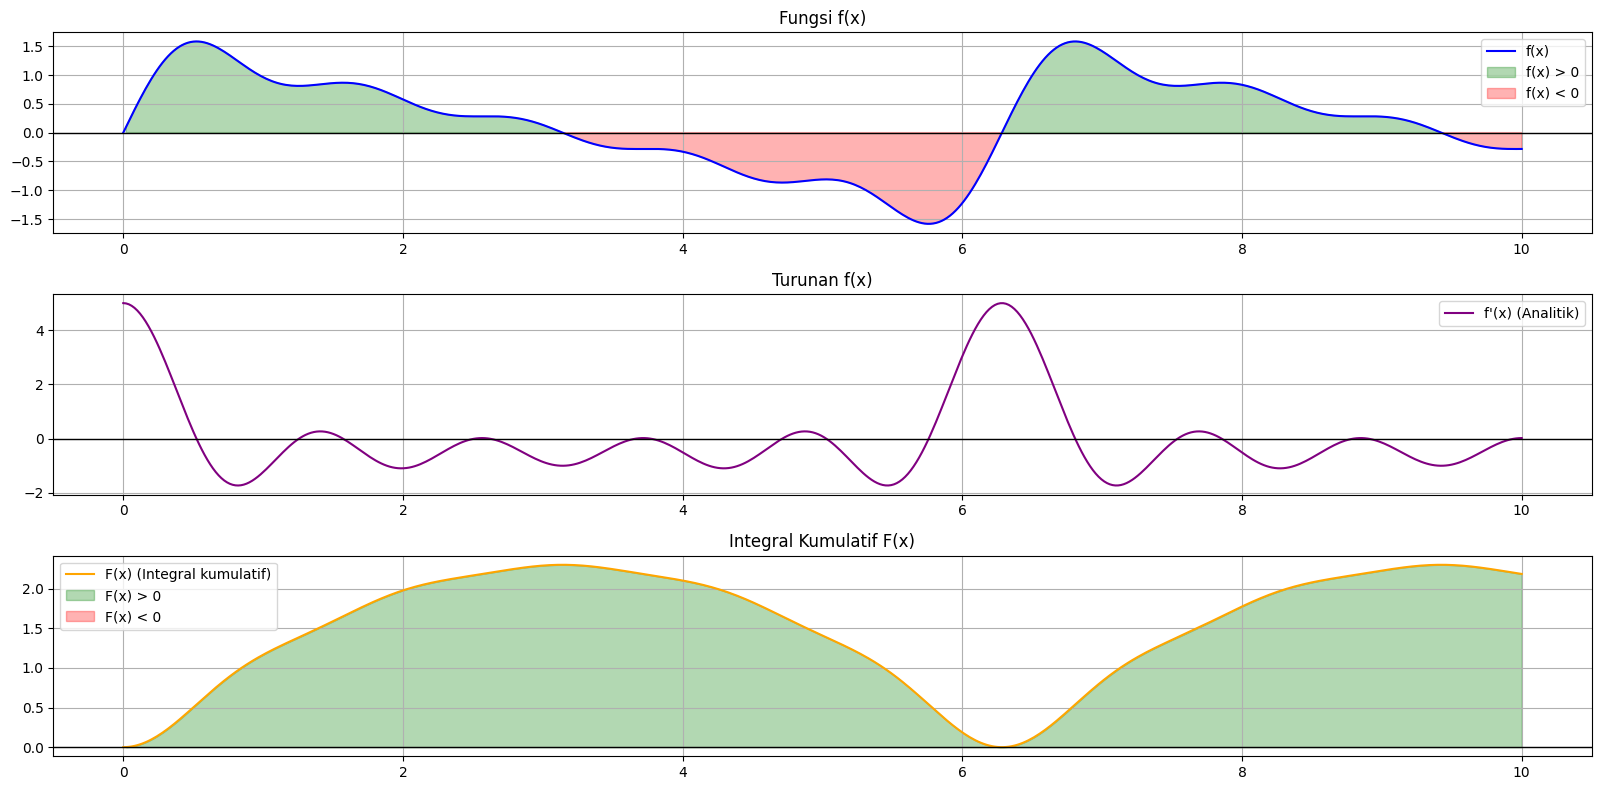

In [ ]:
# =========================
# 4. PLOT SEMUA
# =========================
plt.figure(figsize=(16,8))

# --- Plot f(x) ---
plt.subplot(3,1,1)
plt.plot(x, f, color="blue", label="f(x)")
plt.fill_between(x, f, 0, where=(f > 0), color="green", alpha=0.3, label="f(x) > 0")
plt.fill_between(x, f, 0, where=(f < 0), color="red", alpha=0.3, label="f(x) < 0")
plt.axhline(0, color="black", linewidth=1)
plt.title("Fungsi f(x)")
plt.legend()
plt.grid(True)

# --- Plot f'(x) ---
plt.subplot(3,1,2)
plt.plot(x, f_prime_analitik, color="purple", label="f'(x) (Analitik)")
plt.axhline(0, color="black", linewidth=1)
plt.title("Turunan f(x)")
plt.legend()
plt.grid(True)

# --- Plot F(x) ---
plt.subplot(3,1,3)
plt.plot(x, F, color="orange", label="F(x) (Integral kumulatif)")
plt.fill_between(x, F, 0, where=(F > 0), color="green", alpha=0.3, label="F(x) > 0")
plt.fill_between(x, F, 0, where=(F < 0), color="red", alpha=0.3, label="F(x) < 0")
plt.axhline(0, color="black", linewidth=1)
plt.title("Integral Kumulatif F(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

- Fungsi $f(x)$ merupakan kombinasi deret sinusoidal yang menghasilkan pola osilasi naik turun dengan bagian positif dan negatif yang bergantian. Pada grafik terlihat bahwa fungsi sering melewati sumbu-x, sehingga area di atas dan di bawah sumbu terbagi dalam bentuk hijau (positif) dan merah (negatif).

- Turunan fungsi $f'(x)$ menunjukkan laju perubahan dari $f(x)$. Nilainya berosilasi cukup tajam, menandakan banyak titik ekstrem (puncak dan lembah) pada fungsi aslinya. Saat $f(x)$ mencapai titik maksimum atau minimum, turunan bernilai nol, sesuai dengan teori kalkulus.
- Sementara itu, integral kumulatif $F(x)$ menggambarkan akumulasi luas di bawah kurva sejak $x=0$. Saat $f(x)$ positif, $F(x)$ meningkat, dan saat $f(x)$ negatif, $F(x)$ menurun. Namun, secara keseluruhan pada interval $[0,10]$, kontribusi area positif lebih besar daripada area negatif sehingga integral total bernilai positif. Hal ini memperlihatkan bahwa meskipun fungsi berosilasi, secara rata-rata ia lebih sering memberikan nilai positif dibanding negatif.
